In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from jcopml.pipeline import num_pipe, cat_pipe

In [10]:
df = pd.read_csv("./dataset2.csv")
df

GARDU INDUK  PEMILIK            NAMA        1        2        3  \
0    GI KELAPA GADING  DISJAYA      SAKURA / H    6.210    5.940    6.390   
1    GI KELAPA GADING  DISJAYA     SAKURA / L1   10.250   10.270   10.280   
2    GI KELAPA GADING  DISJAYA     SAKURA / L2   17.640   15.900   21.850   
3    GI KELAPA GADING  DISJAYA     ADENIUM / H    8.100    8.240    8.400   
4    GI KELAPA GADING  DISJAYA    ADENIUM / L1   14.670   14.730   14.890   
..                ...      ...             ...      ...      ...      ...   
135         GI SUNTER      PLN  TRAFO PS1 / L1  167.505  183.644  187.887   
136         GI SUNTER      PLN  TRAFO PS1 / L2  190.357  315.193  262.232   
137         GI SUNTER      PLN   TRAFO PS2 / H   15.561   18.207   19.113   
138         GI SUNTER      PLN  TRAFO PS2 / L1   36.517   33.072   28.481   
139         GI SUNTER      PLN  TRAFO PS2 / L2   44.784   70.288   58.811   

           4        5        6       7  ...       24       25       26  \
0      6.290    6.570    8.410   9.280  ...    0.000    9.870    9.700   
1     10.210   14.090   17.680   8.550  ...    0.000   17.640   13.920   
2     21.490   26.370   36.210  42.000  ...    0.000   44.540   41.570   
3      8.430    8.630    7.500   7.930  ...    0.000    8.460    8.160   
4     15.030   15.310   13.090  14.170  ...    0.000    8.000   14.680   
..       ...      ...      ...     ...  ...      ...      ...      ...   
135  183.889  183.681  184.655  77.498  ...  197.367  170.925  184.870   
136  279.606  201.575  267.781  84.928  ...  263.050  205.478  380.847   
137   18.027   19.996   19.867  12.090  ...   19.850   18.170   13.786   
138   34.096   34.186   31.568  17.098  ...   18.430   46.170   36.606   
139   61.663   45.504   60.590  24.396  ...   58.830   47.134   81.929   

          27       28       29       30       31   RATA-RATA  PENGGUNAAN  
0      9.740   10.040    9.050    8.610   10.430    8.103548           0  
1     14.300   14.280   14.240   13.800   14.580   14.262903           0  
2     44.720   40.120   32.570   28.600   44.180   30.950645           1  
3      8.400    8.240    7.800    7.880    8.420    7.862903           0  
4     15.210   14.960   14.940   14.690   15.340   13.610323           0  
..       ...      ...      ...      ...      ...         ...         ...  
135  195.261  179.217  180.792  182.538  188.365  183.566065           2  
136  283.221  107.015  309.897  331.141  209.884  415.054258           2  
137   10.363   19.816   15.535   18.525   19.772   18.342194           0  
138   27.308   38.195   35.571   37.978   27.330   32.148871           1  
139   54.977   23.819   67.175   71.236   45.999   56.907065           1  

[140 rows x 36 columns]

In [11]:
X = df.drop(columns="PENGGUNAAN")
y = df.PENGGUNAAN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((84, 35), (56, 35), (84,), (56,))

In [12]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','RATA-RATA']),
    ('categoric', cat_pipe(encoder='onehot'), ['GARDU INDUK', 'PEMILIK']),
])

from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['1', '2', '3', '4', '5', '6',
                                                   '7', '8', '9', '10', '11',
                                                   '12', '13', '14', '15', '16',
                                                   '17', '18', '19', '20', '21',
                                                   '22', '23', '24', '25', '26',
                                                   '27', '28', '29', '30', ...]),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GARDU INDUK',
                                                   'PEMILIK'])])),
                ('algo', GaussianNB())])

In [14]:
pipeline.score(X_train, y_train)

0.9642857142857143

In [15]:
pipeline.score(X_test, y_test)

0.9821428571428571

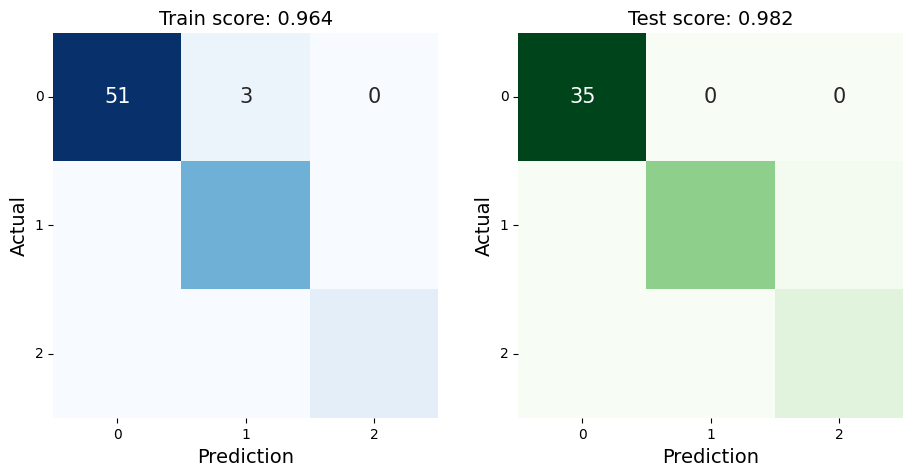

In [16]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

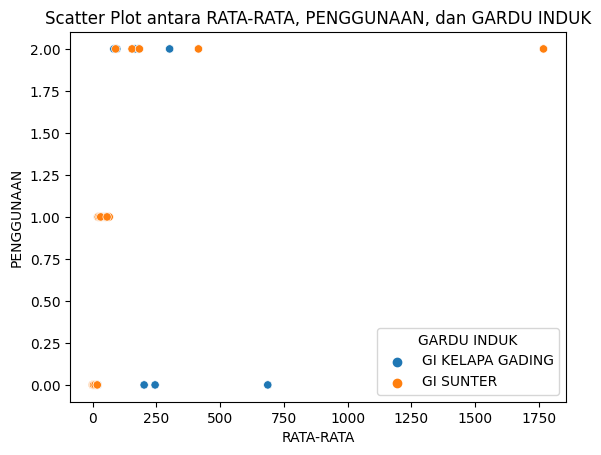

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter DataFrame untuk mengambil subset data yang dibutuhkan
scatter_data = df[['GARDU INDUK', 'RATA-RATA', 'PENGGUNAAN']]

# Buat scatter plot
sns.scatterplot(x='RATA-RATA', y='PENGGUNAAN', hue='GARDU INDUK', data=scatter_data)
plt.title('Scatter Plot antara RATA-RATA, PENGGUNAAN, dan GARDU INDUK')
plt.show()

In [18]:
# Gabungkan variabel target ke dalam DataFrame untuk membuat pair plot
train_data = X_train.copy()
train_data['PENGGUNAAN'] = y_train

# Pilih beberapa fitur yang ingin divisualisasikan
selected_features = ['1', '2', '3', '4', '5', '6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31', 'PENGGUNAAN']

# Buat pair plot
sns.pairplot(train_data[selected_features], hue='PENGGUNAAN', markers=["o", "s"], palette="husl")

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

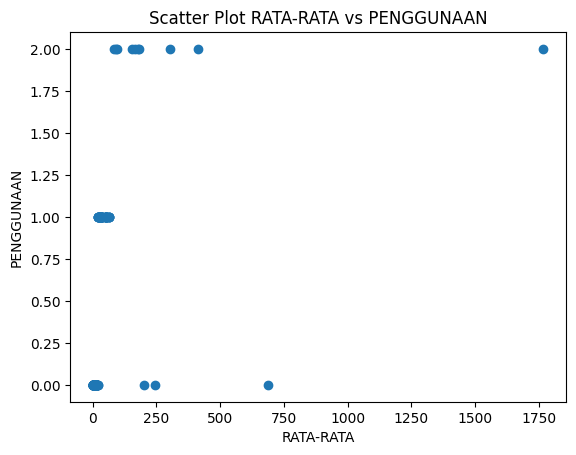

In [19]:
plt.scatter(df['RATA-RATA'], df['PENGGUNAAN'])
plt.xlabel('RATA-RATA')
plt.ylabel('PENGGUNAAN')
plt.title('Scatter Plot RATA-RATA vs PENGGUNAAN')
plt.show()

In [20]:
X_pred = pd.read_csv("./testing2.csv")
X_pred

GARDU INDUK  PEMILIK             NAMA        1        2        3  \
0   GI KELAPA GADING      PLN      TRAFO 2 / H   79.650   71.910   74.960   
1          GI SUNTER  DISJAYA      MONETER / H    0.000    0.000    0.000   
2          GI SUNTER  DISJAYA     MONETER / L1    0.000    0.000    0.000   
3          GI SUNTER  DISJAYA     MONETER / L2    0.000    0.000    0.000   
4   GI KELAPA GADING  DISJAYA       DAHLIA / H   19.980   19.420   19.870   
5   GI KELAPA GADING  DISJAYA      DAHLIA / L1   31.590   31.310   31.690   
6   GI KELAPA GADING  DISJAYA      DAHLIA / L2   51.170   49.480   51.080   
7   GI KELAPA GADING  DISJAYA     LAVENDER / H    1.450    1.490    1.550   
8   GI KELAPA GADING  DISJAYA    LAVENDER / L1    2.800    2.890    2.920   
9   GI KELAPA GADING  DISJAYA    LAVENDER / L2    4.480    4.590    4.310   
10         GI SUNTER  DISJAYA     EKONOMI / L1   22.342   23.420   23.614   
11  GI KELAPA GADING  DISJAYA       SAKURA / H    6.210    5.940    6.390   
12  GI KELAPA GADING  DISJAYA     CEMPAKA / L2    0.000    0.000    0.000   
13         GI SUNTER      PLN     TRAFO 2 / L1   52.860   54.568   54.555   
14         GI SUNTER      PLN     TRAFO 2 / L2  148.137  205.315  146.501   
15         GI SUNTER      PLN  TRAFO 2 / KVARH   59.331   71.102   65.197   
16         GI SUNTER      PLN    TRAFO PS1 / H   88.288   91.066   90.141   
17         GI SUNTER      PLN   TRAFO PS1 / L1  167.505  183.644  187.887   
18         GI SUNTER      PLN   TRAFO PS1 / L2  190.357  315.193  262.232   
19         GI SUNTER      PLN    TRAFO PS2 / H   15.561   18.207   19.113   
20         GI SUNTER      PLN   TRAFO PS2 / L1   36.517   33.072   28.481   
21         GI SUNTER      PLN   TRAFO PS2 / L2   44.784   70.288   58.811   
22  GI KELAPA GADING  DISJAYA      SAKURA / L2   17.640   15.900   21.850   
23  GI KELAPA GADING  DISJAYA      ADENIUM / H    8.100    8.240    8.400   
24  GI KELAPA GADING  DISJAYA     ADENIUM / L1   14.670   14.730   14.890   
25  GI KELAPA GADING  DISJAYA     ADENIUM / L2   19.660   18.310   21.240   
26  GI KELAPA GADING  DISJAYA        ARBEY / H   18.820   18.810   18.890   
27  GI KELAPA GADING  DISJAYA       ARBEY / L1   32.200   32.490   32.670   
28  GI KELAPA GADING  DISJAYA       ARBEY / L2   46.550   42.350   46.600   
29  GI KELAPA GADING  DISJAYA    FLAMBOYAN / H    7.280    7.290    7.320   
30  GI KELAPA GADING  DISJAYA   FLAMBOYAN / L1    8.810   12.060   10.630   
31  GI KELAPA GADING  DISJAYA   FLAMBOYAN / L2   54.150    0.560   11.730   
32  GI KELAPA GADING  DISJAYA      CEMPAKA / H    0.000    0.000    0.000   
33  GI KELAPA GADING  DISJAYA     CEMPAKA / L1    0.000    0.000    0.000   
34         GI SUNTER      PLN      TRAFO 1 / H   22.790   22.570   22.660   
35         GI SUNTER      PLN     TRAFO 1 / L1   31.560   32.850   32.920   
36         GI SUNTER      PLN     TRAFO 1 / L2   48.200   72.770   73.520   
37         GI SUNTER      PLN  TRAFO 1 / KVARH   22.870   29.200   28.870   
38         GI SUNTER      PLN      TRAFO 1 / H   22.788   22.568   22.658   
39         GI SUNTER      PLN     TRAFO 1 / L1   31.551   32.840   32.907   
40         GI SUNTER      PLN     TRAFO 1 / L2   56.214   65.429   70.579   
41         GI SUNTER      PLN  TRAFO 1 / KVARH   24.625   27.585   28.225   
42         GI SUNTER      PLN      TRAFO 2 / H   49.320   51.950   52.550   
43         GI SUNTER      PLN     TRAFO 2 / L1   52.870   54.590   54.570   
44         GI SUNTER      PLN     TRAFO 2 / L2  124.190  208.370  171.070   
45         GI SUNTER      PLN  TRAFO 2 / KVARH   52.400   77.810   66.600   
46         GI SUNTER      PLN      TRAFO 2 / H   49.307   51.931   52.531   
47         GI SUNTER      PLN     TRAFO 2 / L1   52.860   54.568   54.555   
48         GI SUNTER      PLN     TRAFO 2 / L2  148.137  205.315  146.501   
49         GI SUNTER      PLN  TRAFO 2 / KVARH   59.331   71.102   65.197   
50         GI SUNTER      PLN    TRAFO PS1 / H   88.288   91.066   90.141   
51   

In [21]:
print(X_pred.columns)

Index(['GARDU INDUK', 'PEMILIK', 'NAMA', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'RATA-RATA'],
      dtype='object')


**Prediksi kalau pakai data testing dari split dataset sebelumnya**

In [22]:
# Prediksi menggunakan pipeline
y_pred_data = pipeline.predict(X_test)

# Buat DataFrame baru untuk data testing beserta hasil prediksi dan target
df_test_with_predictions = X_test.copy()
df_test_with_predictions['PREDIKSI_PENGGUNAAN'] = y_pred_data
df_test_with_predictions['TARGET_PENGGUNAAN'] = y_test  # Menambahkan kolom target

# Tampilkan DataFrame yang sudah diperbarui
df_test_with_predictions

GARDU INDUK  PEMILIK             NAMA        1        2        3  \
108         GI SUNTER  DISJAYA    LOGISTIK / L2   36.171   44.111   40.270   
67   GI KELAPA GADING      PLN     TRAFO 2 / L2  224.820  210.930  264.570   
31   GI KELAPA GADING  DISJAYA      KAKTUS / L1   12.720   12.600   12.830   
119         GI SUNTER      PLN     TRAFO 1 / L1   31.560   32.850   32.920   
42   GI KELAPA GADING  DISJAYA       SEROJA / H    6.470    6.260    6.610   
12   GI KELAPA GADING  DISJAYA      CEMPAKA / H    0.000    0.000    0.000   
81          GI SUNTER  DISJAYA     INFLASI / L2    0.000    0.000    0.000   
69   GI KELAPA GADING      PLN      TRAFO 2 / H   79.650   71.910   74.960   
104         GI SUNTER  DISJAYA      GROSIR / L1   10.126    9.993   10.053   
109         GI SUNTER  DISJAYA        NIAGA / H   11.526   12.591   12.740   
113         GI SUNTER  DISJAYA       RITEL / L1    4.381    4.249    4.448   
56   GI KELAPA GADING      PLN      KOCHIA / L2    0.000    0.000    0.000   
66   GI KELAPA GADING      PLN     TRAFO 2 / L1  123.880  123.500  124.620   
19   GI KELAPA GADING  DISJAYA       CERRY / L1    8.740    9.510    9.340   
132         GI SUNTER      PLN     TRAFO 2 / L2  148.137  205.315  146.501   
78          GI SUNTER  DISJAYA      BISNIS / L2    0.000    0.000    0.000   
11   GI KELAPA GADING  DISJAYA   FLAMBOYAN / L2   54.150    0.560   11.730   
27   GI KELAPA GADING  DISJAYA      EDELWIS / H    0.000    0.000    0.000   
127         GI SUNTER      PLN     TRAFO 2 / L1   52.870   54.590   54.570   
110         GI SUNTER  DISJAYA       NIAGA / L1    4.398    4.268    4.466   
36   GI KELAPA GADING  DISJAYA     LAVENDER / H    1.450    1.490    1.550   
118         GI SUNTER      PLN      TRAFO 1 / H   22.790   22.570   22.660   
60   GI KELAPA GADING      PLN  TRAFO 1 / KVARH  272.180  260.140  289.560   
4    GI KELAPA GADING  DISJAYA     ADENIUM / L1   14.670   14.730   14.890   
131         GI SUNTER      PLN     TRAFO 2 / L1   52.860   54.568   54.555   
26   GI KELAPA GADING  DISJAYA     KRISSAN / L2   24.820   24.120   24.920   
138         GI SUNTER      PLN   TRAFO PS2 / L1   36.517   33.072   28.481   
96          GI SUNTER  DISJAYA      DEVISA / L2    0.000    0.000    0.000   
16   GI KELAPA GADING  DISJAYA        AKG2 / L1    7.650    7.220    7.480   
18   GI KELAPA GADING  DISJAYA        CERRY / H    4.850    5.310    5.470   
10   GI KELAPA GADING  DISJAYA   FLAMBOYAN / L1    8.810   12.060   10.630   
111         GI SUNTER  DISJAYA       NIAGA / L2   29.474   38.751   34.759   
101         GI SUNTER  DISJAYA    INVESTOR / L1    0.000    0.000    0.000   
94          GI SUNTER  DISJAYA       DEVISA / H    0.000    0.000    0.000   
51   GI KELAPA GADING  DISJAYA        LOTUS / H    0.000    0.000    0.000   
45   GI KELAPA GADING  DISJAYA        ASOKA / H    1.640    1.450    1.820   
82          GI SUNTER  DISJAYA        KUOTA / H    0.000    0.000    0.000   
136         GI SUNTER      PLN   TRAFO PS1 / L2  190.357  315.193  262.232   
65   GI KELAPA GADING      PLN      TRAFO 2 / H   79.680   71.930   74.970   
0    GI KELAPA GADING  DISJAYA       SAKURA / H    6.210    5.940    6.390   
55   GI KELAPA GADING      PLN      KOCHIA / L1    0.000    0.000    0.000   
28   GI KELAPA GADING  DISJAYA     EDELWIS / L1    0.000    0.000    0.000   
40   GI KELAPA GADING  DISJAYA       ASTER / L1    5.100    4.970    5.270   
24   GI KELAPA GADING  DISJAYA      KRISSAN / H    9.310    9.140    9.420   
93          GI SUNTER  DISJAYA      EKSPOR / L2   20.963   25.702   22.789   
126         GI SUNTER      PLN      TRAFO 2 / H   49.320   51.950   52.550   
112         GI SUNTER  DISJAYA        RITEL / H   11.549   12.617   12.765   
64   GI KELAPA GADING      PLN  TRAFO 1 / KVARH  272.030  260.130  289.570   
44   GI KELAPA GADING  DISJAYA      SEROJA / L2   17.560   18.040   19.580   
15   GI KELAPA GADING  DISJAYA         AKG2 / H    6.470    0.170    0.230   
89          GI SUNTER  DISJAYA  